<a href="https://colab.research.google.com/github/akiabe/coursera-ml-stanford/blob/master/ml_ex7_K_means_and_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Implementing K-means clustering from sklearn**

In [0]:
# Import library
import numpy as np
from sklearn.cluster import KMeans
import scipy.io as scio
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load training data
data = scio.loadmat('ex7data2.mat')
X = data['X']
print ("X shape: " + str(X.shape))

X shape: (300, 2)


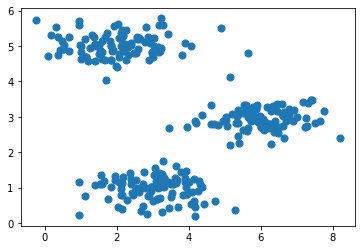

In [4]:
# Visualize data
plt.scatter(X[:, 0], X[:, 1], s=50);

In [0]:
# K-means
km = KMeans(n_clusters=3, init='random', random_state=0)
y_km = km.fit(X)

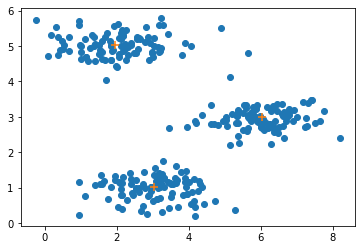

In [6]:
# Visualize K-means clustering results
plt.scatter(X[:,0], X[:,1]) 
plt.scatter(y_km.cluster_centers_[:,0], y_km.cluster_centers_[:,1], s=50, marker='+')

**Implement K-means clustering from scratch**



In [0]:
# Finding closest centroids
def find_closest_centroids(X, centroids):
  """
  Computes the centroid memberships for every example

  Arguments:
  X -- Data set size (m, n)
  centroids -- K-means centroids of size (K, n)
               K is the number of clusters and n is the data dimension

  Return:
  idx -- vector of centroids assignments (m, 1)

  """
  m = X.shape[0]
  idx = np.zeros(m)

  for i in range(m):
    distance = np.sum(np.square(centroids - X[i, :]), axis=1)
    idx[i] = np.argmin(distance)
  
  return idx

In [8]:
# Test find_closest_centroids()
K = 3
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
idx = find_closest_centroids(X, initial_centroids)

print ("Closest centroids for the first 3 examples: " + str(idx[0:3]))

Closest centroids for the first 3 examples: [0. 2. 1.]


In [0]:
# Compute centroid means
def compute_centroids(X, idx, K):
  """
  Returns the new centroids by computing the means of the data points assigned to each centroid

  """
  m, n = X.shape
  centroids = np.zeros((K, n))

  for k in range(K):
    x = X[idx == k]
    centroids[k, :] = np.mean(x, axis=0)

  return centroids

In [10]:
# Test compute_centroids()
centroids = compute_centroids(X, idx, K)
print ("Centroids computed after initial finding of closest centroids:: " + str(centroids))

Centroids computed after initial finding of closest centroids:: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


In [0]:
# K-means clustering
def run_k_means(X, initial_centroids, max_iters, plot_progress=False):
  """
  Runs the K-Means algorithm on data X

  Arguments:
  X -- Data set size (m, n)
  initial_centroids -- shape (K, n)
  max_iters -- Total number of iteration
  plot_progress -- True to plot progress for each iteration

  Return:
  centroids -- final centroids (K, n)
  idx -- vector of centroids assignments (m, 1)

  """
  K = initial_centroids.shape[0]
  centroids = initial_centroids
  history_centroids = np.zeros((max_iters, centroids.shape[0], centroids.shape[1]))
  idx = np.zeros(X.shape[0])

  for i in range(max_iters):
    print("K-means iteration {}/{}".format(i+1, max_iters))
    history_centroids[i, :] = centroids

    idx = find_closest_centroids(X, centroids)
    
    if plot_progress:
      plt.figure()
      plt.scatter(X[:,0], X[:,1]) 
      plt.scatter(history_centroids[0:i+1, :, 0], history_centroids[0:i+1, :, 1], s=50, marker='+')
      plt.show()
    
    centroids = compute_centroids(X, idx, K)
    
  return centroids, idx

K-means iteration 1/10


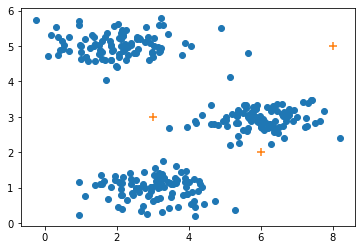

K-means iteration 2/10


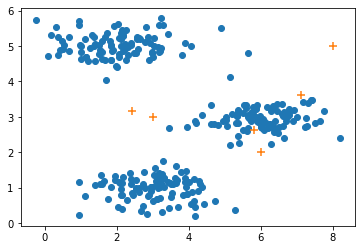

K-means iteration 3/10


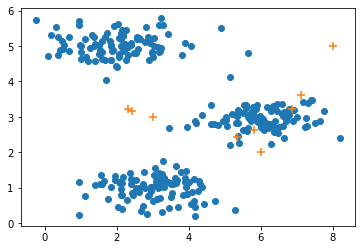

K-means iteration 4/10


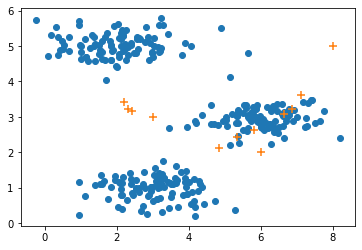

K-means iteration 5/10


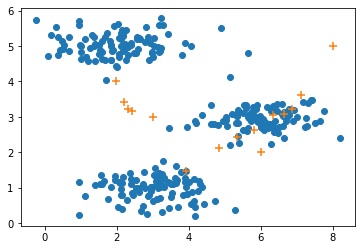

K-means iteration 6/10


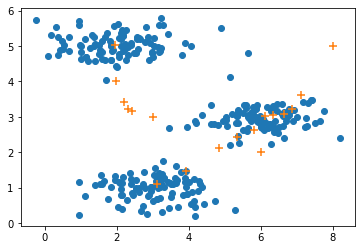

K-means iteration 7/10


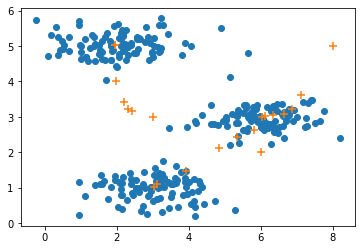

K-means iteration 8/10


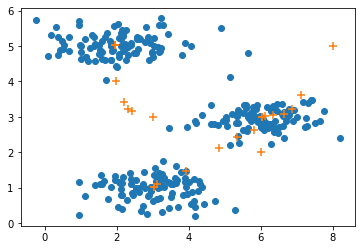

K-means iteration 9/10


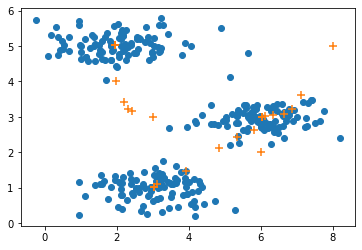

K-means iteration 10/10


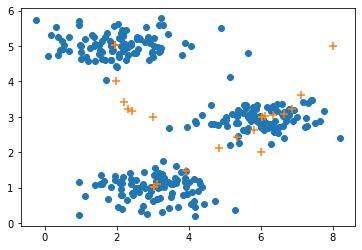

In [18]:
# Run K-Means algorithm
max_iters = 10
centroids, idx = run_k_means(X, initial_centroids, max_iters, True)